1. Original Image with Histogram


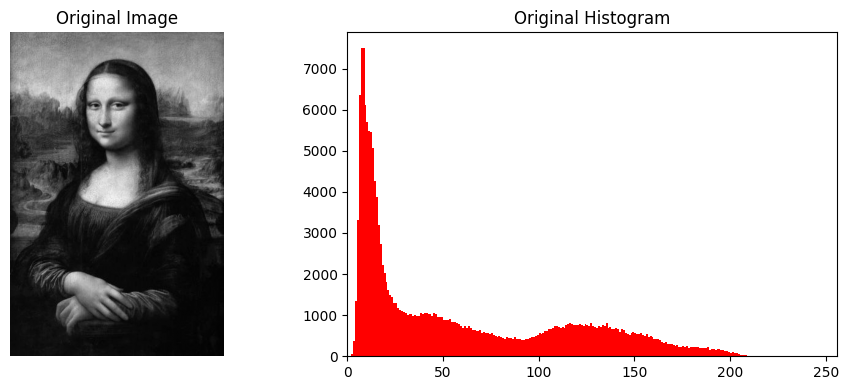

2. Contrast Stretched Image with Histogram


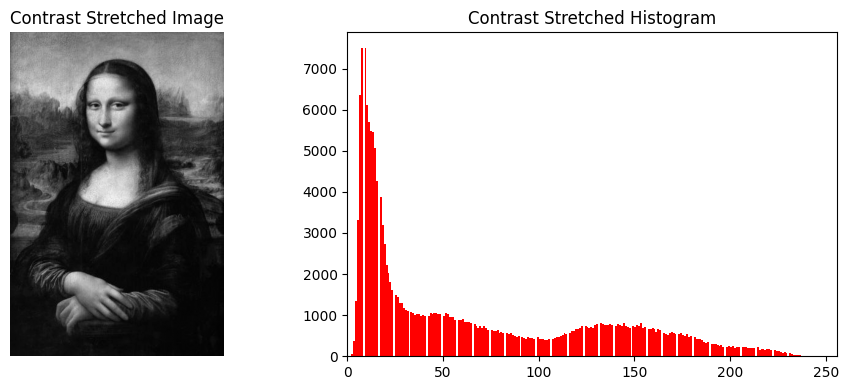

3. Histogram Equalized Image with Histogram


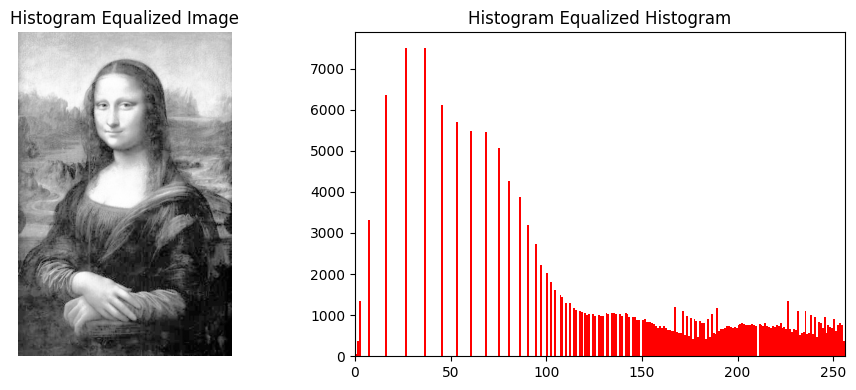

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://images.squarespace-cdn.com/content/v1/555510e6e4b0ecb85ccf4059/1441217664123-FTG14B8CIP65WN98JBE7/Mona_Lisa_GS2.jpg"  # low contrast example


urllib.request.urlretrieve(url, "input_img.png")


image = cv2.imread("input_img.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not loaded. Please check the URL!")


def show_image_histogram(img, title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(f"{title} Image")
    axs[0].axis('off')

    axs[1].hist(img.ravel(), bins=256, range=(0, 256), color='red')
    axs[1].set_title(f"{title} Histogram")
    axs[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Step 2: Contrast Stretching
def contrast_stretch(img):
    r_min, r_max = np.min(img), np.max(img)
    stretched = ((img - r_min) / (r_max - r_min)) * 255
    return stretched.astype('uint8')

# Step 3: Histogram Equalization
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Step 4: Apply Methods
stretched_img = contrast_stretch(image)
equalized_img = histogram_equalization(image)

# Step 5: Display Results
print("1. Original Image with Histogram")
show_image_histogram(image, "Original")

print("2. Contrast Stretched Image with Histogram")
show_image_histogram(stretched_img, "Contrast Stretched")

print("3. Histogram Equalized Image with Histogram")
show_image_histogram(equalized_img, "Histogram Equalized")

